In [19]:
import numpy as np
theta = np.array([64.4, 82.9,98.3, 98.9, 112.3, 124.4, 124.7, 134.6, 135.8, 139, 143.1, 144, 145.6, 147.8, 148.2, 143.8, 143.7, 143.4, 142.8, 139.4, 137.9, 126.2, 122.6,74, 69.3])
cos_theta = np.cos(np.radians(theta))

In [20]:
cos_theta

array([ 0.43208575,  0.12360148, -0.1443562 , -0.15471039, -0.37945616,
       -0.564967  , -0.56927952, -0.70215305, -0.71691061, -0.75470958,
       -0.79968466, -0.80901699, -0.8251135 , -0.84619317, -0.84989269,
       -0.80696031, -0.80592828, -0.80281748, -0.79652992, -0.75927131,
       -0.74197584, -0.59060567, -0.53877079,  0.27563736,  0.35347484])

In [21]:
e = np.array([-1.3, -1.2358, -1.1711, -1.1065, -1.0419, -0.9772, -0.9127, -0.8479, -0.7833, -0.7185, -0.6539, -0.5894, -0.5246, -0.4599, -0.3953, -0.3306, -0.266, -0.2014, -0.1366, -0.0719, -0.0074, 0.0573, 0.1219, 0.1865, 0.2508])

In [25]:
sigma = 375-51*cos_theta #здесь минус, ане плюс, так как плагин измеряет внешний угол, а не внутренний (внешний = 180-внутренний)

In [26]:
sigma

array([352.96362681, 368.69632469, 382.36216625, 382.8902297 ,
       394.35226414, 403.81331717, 404.03325569, 410.8098057 ,
       411.56244099, 413.49018859, 415.78391758, 416.25986671,
       417.08078841, 418.15585147, 418.34452734, 416.15497592,
       416.10234239, 415.94369123, 415.62302582, 413.72283667,
       412.84076789, 405.12088905, 402.47731004, 360.94249485,
       356.97278297])

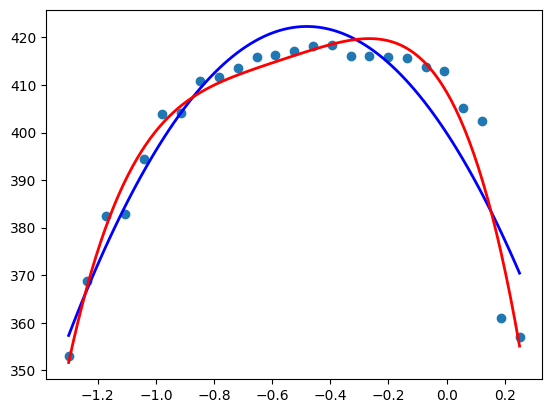

In [29]:
import matplotlib.pyplot as plt
plt.scatter(e, sigma)

coeffs_2 = np.polyfit(e, sigma, 2)
poly_2 = np.poly1d(coeffs_2)

# Степень 4
coeffs_4 = np.polyfit(e, sigma, 4)
poly_4 = np.poly1d(coeffs_4)

# Создание точек для гладкой кривой
x_smooth = np.linspace(min(e), max(e), 100)
y_smooth_2 = poly_2(x_smooth)
y_smooth_4 = poly_4(x_smooth)

plt.plot(x_smooth, y_smooth_2, 'b-', linewidth=2, 
         label=f'Многочлен 2-й степени: y = {coeffs_2[0]:.3f}x² + {coeffs_2[1]:.3f}x + {coeffs_2[2]:.3f}')

# Аппроксимация степень 4
plt.plot(x_smooth, y_smooth_4, 'r-', linewidth=2, 
         label=f'Многочлен 4-й степени')

plt.show()

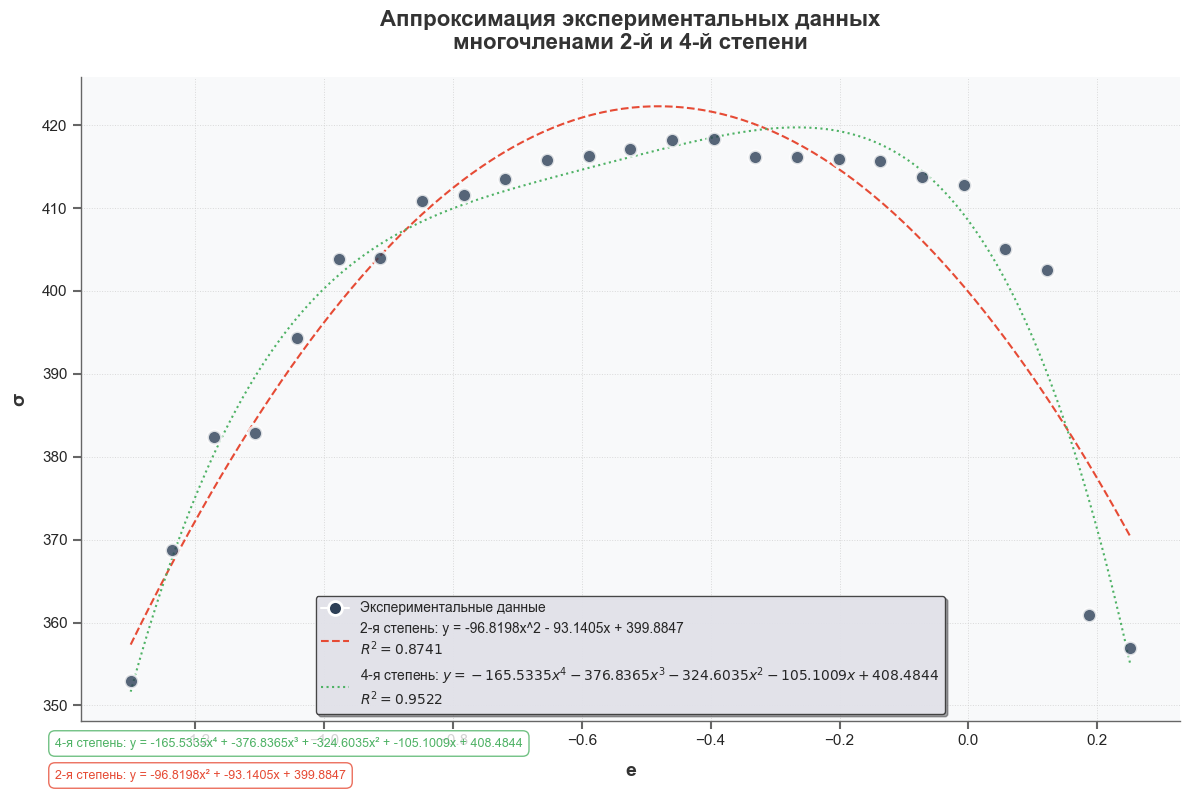

РЕЗУЛЬТАТЫ АППРОКСИМАЦИИ

Многочлен 2-й степени:
y = -96.819798x² + -93.140514x + 399.884717
R² = 0.874107

Многочлен 4-й степени:
y = -165.533527x⁴ + -376.836549x³ + -324.603522x² + -105.100877x + 408.484392
R² = 0.952204


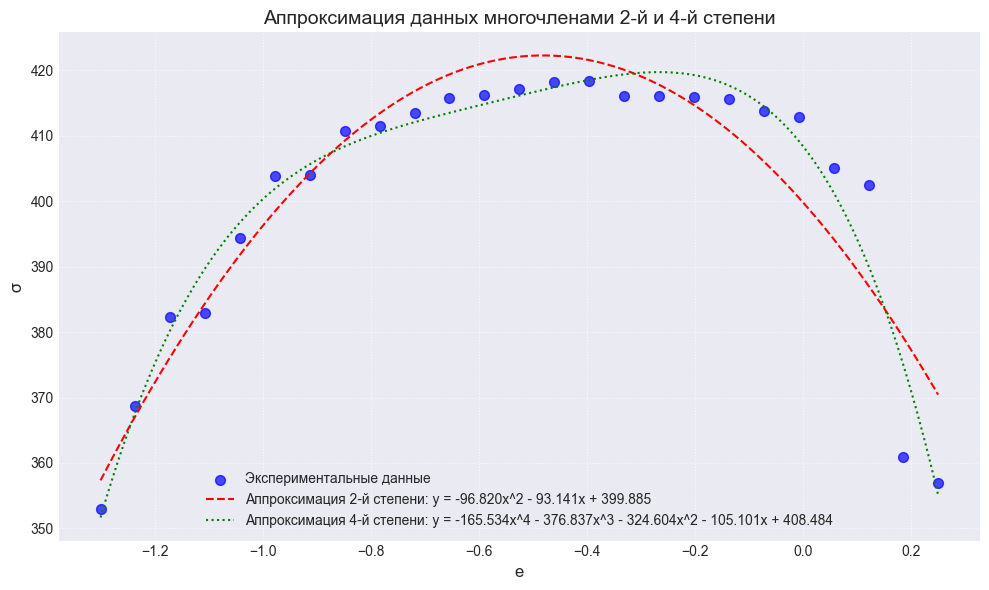

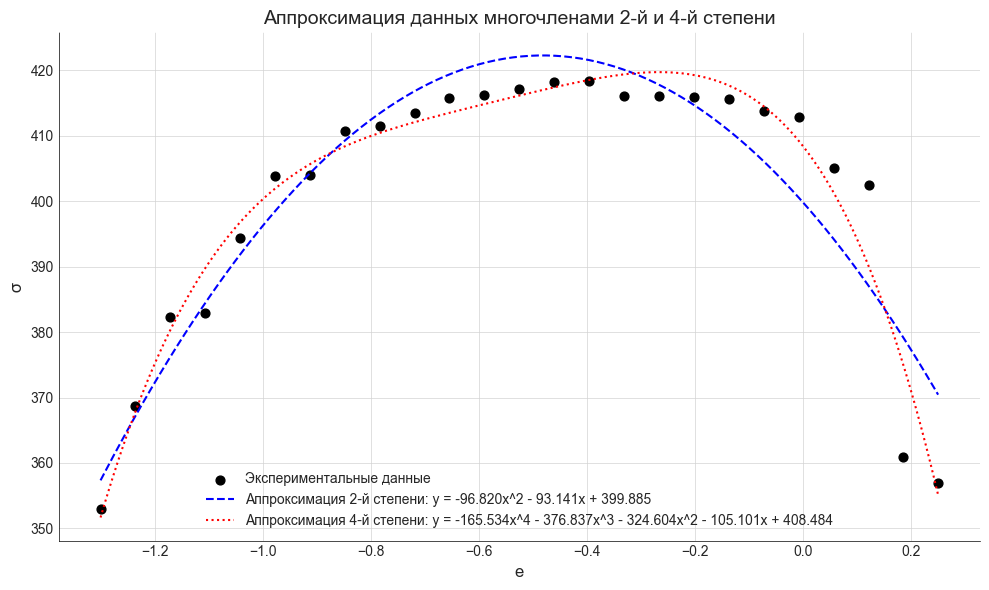

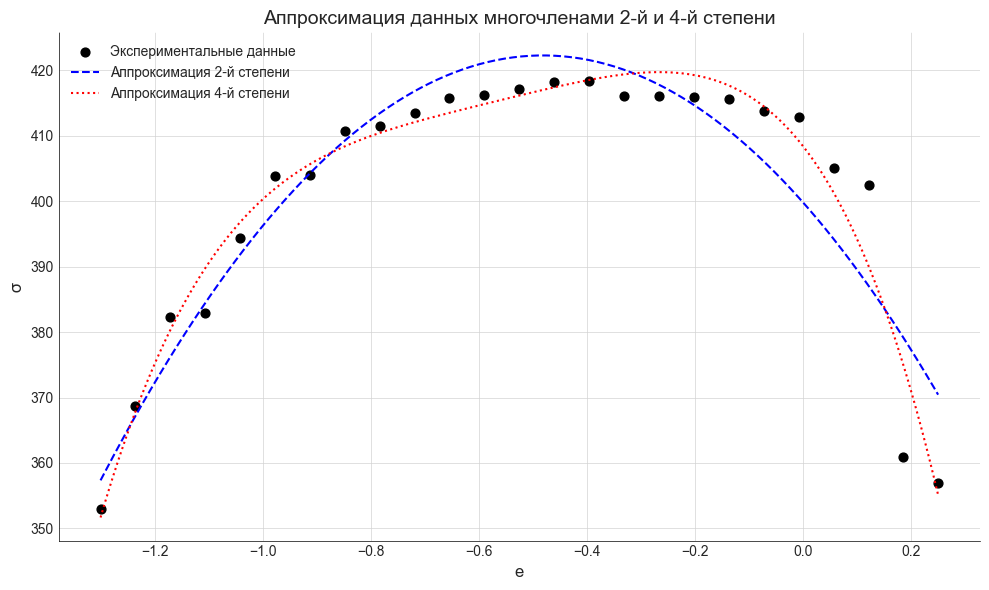

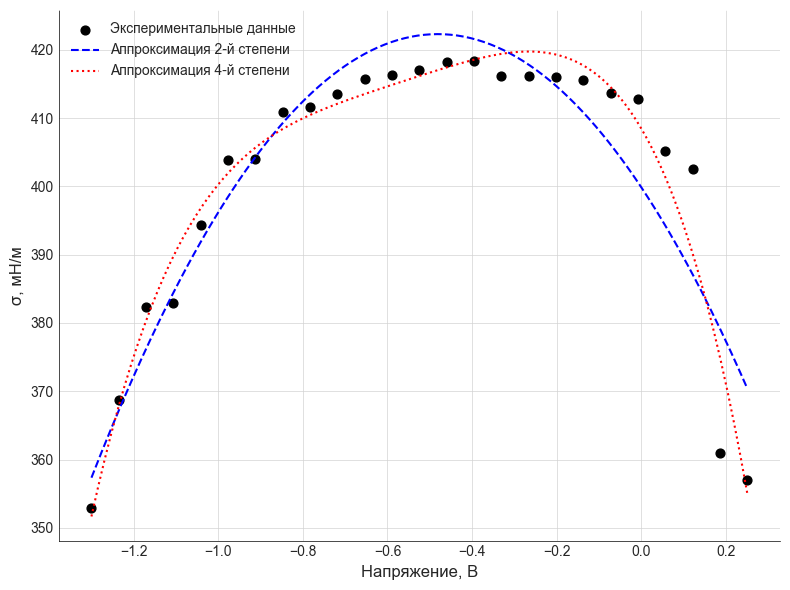

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Исходные данные (предполагается, что e и sigma уже определены)
# e = ваши данные по оси X
# sigma = ваши данные по оси Y

# Аппроксимация многочленами
# Степень 2
coeffs_2 = np.polyfit(e, sigma, 2)
poly_2 = np.poly1d(coeffs_2)

# Степень 4
coeffs_4 = np.polyfit(e, sigma, 4)
poly_4 = np.poly1d(coeffs_4)

# Создание точек для гладкой кривой
x_smooth = np.linspace(min(e), max(e), 200)
y_smooth_2 = poly_2(x_smooth)
y_smooth_4 = poly_4(x_smooth)

# Создание графика с соотношением сторон 4:3
plt.figure(figsize=(8, 6), facecolor='white')  # 8:6 = 4:3
ax = plt.gca()
ax.set_facecolor('white')

# Исходные точки
plt.scatter(e, sigma, 
            color='black',
            s=40,
            marker='o',
            label='Экспериментальные данные')

# Аппроксимация степень 2 (пунктирная, тонкая)
plt.plot(x_smooth, y_smooth_2, 
         color='blue',
         linestyle='--',
         linewidth=1.5,
         label='Аппроксимация 2-й степени')

# Аппроксимация степень 4 (пунктирная, тонкая)
plt.plot(x_smooth, y_smooth_4, 
         color='red',
         linestyle=':',
         linewidth=1.5,
         label='Аппроксимация 4-й степени')

# Настройка графика
plt.xlabel('Напряжение, В', fontsize=12)
plt.ylabel('σ, мН/м', fontsize=12)

# Обычная сетка (серые линии)
plt.grid(True, 
         linestyle='-', 
         color='lightgray',
         linewidth=0.5)

# Настройка границ
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)

plt.savefig("Коэф пов натяжения от напряжения", bbox_inches='tight')

plt.legend(fontsize=10)
plt.tight_layout()
plt.show()